# Gradient Boosting (GBM) in Python


In [1]:
# import libraries

import pandas as pd
import numpy as np
import os


# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# insert data file: staff_16-17
df=pd.read_excel('D:/My data/Aru/Project/staff utlz latest 16-17_masked.xlsx')

In [3]:
df.rename(columns={'Employee Number':'Employee No'},inplace=True)
print(df.head())


   Employee No Profit Center      Employee Name Employee Position  \
0            1        PC - 1   Rochette Jilleen           Level 2   
1            2        PC - 2     Daryl Natalina           Level 2   
2            3        PC - 2  Annnora Gabrielle           Level 2   
3            4        PC - 3        Barbee Joey           Level 2   
4            5        PC - 4   Idalina Lauraine           Level 1   

  Employee Location          People Group Employee Category   Supervisor name  \
0        Location 3  Client Service Staff         Level 1/2  Idalina Lauraine   
1        Location 7  Client Service Staff         Level 1/2  Idalina Lauraine   
2        Location 7  Client Service Staff         Level 1/2  Idalina Lauraine   
3        Location 1  Client Service Staff         Level 1/2  Idalina Lauraine   
4        Location 3  Client Service Staff         Level 1/2     Abagail Druci   

   Join Date Current Status Termination Date  Total Available Hours  \
0 2000-09-30         Active

In [4]:
print("NO.of Records : ",df.shape[0])

print("NO.of Columns : ",df.shape[1])

print(df.columns)

NO.of Records :  789
NO.of Columns :  18
Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Termination Date',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            789 non-null    int64         
 1   Profit Center          789 non-null    object        
 2   Employee Name          789 non-null    object        
 3   Employee Position      789 non-null    object        
 4   Employee Location      789 non-null    object        
 5   People Group           789 non-null    object        
 6   Employee Category      789 non-null    object        
 7   Supervisor name        789 non-null    object        
 8   Join Date              789 non-null    datetime64[ns]
 9   Current Status         789 non-null    object        
 10  Termination Date       789 non-null    object        
 11  Total Available Hours  789 non-null    float64       
 12  Work Hours             789 non-null    float64       
 13  Leave

In [6]:
df.describe()

,Employee No,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
count,789.000000,789.00000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,395.000000,1457.54071,1068.146185,181.152725,32.852826,77.335868,399.150355
std,227.908973,575.80742,637.485039,163.632969,33.670871,268.656612,379.930230
min,1.000000,0.00000,0.000000,0.000000,-11.000000,-24.000000,-28.500000
25%,198.000000,1216.00000,493.000000,104.000000,5.660000,0.000000,120.000000
50%,395.000000,1762.00000,1176.000000,168.000000,22.500000,0.000000,297.000000
75%,592.000000,1860.00000,1631.000000,227.000000,50.000000,0.000000,563.500000
max,789.000000,2088.00000,2413.000000,1576.000000,169.000000,1876.000000,2458.500000


# Data Preparation 

1. check missing values

In [7]:
df.isnull().sum()
# no null values in data set

Employee No              0
Profit Center            0
Employee Name            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Supervisor name          0
Join Date                0
Current Status           0
Termination Date         0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [8]:
#checking the categorical and continuous columns
df.nunique().sort_values()

People Group               2
Current Status             4
Employee Category          7
Employee Location          8
Profit Center             10
Employee Position         12
Termination Date          15
Join Date                115
Leave Hours              116
Supervisor name          118
BD Hours                 120
Training Hours           223
NC Hours                 549
Total Available Hours    577
Work Hours               602
Utilization%             740
Employee Name            789
Employee No              789
dtype: int64

### Drop unnecessary columns

In [9]:
df=df.drop('Employee No',axis=1)

In [10]:
df=df.drop('Employee Name',axis=1)

In [11]:
df=df.drop('Employee Location',axis=1)

In [12]:
df=df.drop('BD Hours',axis=1)

In [13]:
df=df.drop('Training Hours',axis=1)

In [14]:
df=df.drop('Work Hours',axis=1)

In [15]:
df=df.drop('NC Hours',axis=1)

In [16]:
df=df.drop('Utilization%',axis=1)

In [17]:
df=df.drop('Leave Hours',axis=1)

In [18]:
df=df.drop('Total Available Hours',axis=1)

In [19]:
 df=df.drop('Supervisor name',axis=1) 


In [20]:
# check data file
print(df.columns)

Index(['Profit Center', 'Employee Position', 'People Group',
       'Employee Category', 'Join Date', 'Current Status', 'Termination Date'],
      dtype='object')


convert categorical data into number format

In [21]:
# current status
# Active = 0
# Resigned = 1
# Secondment = 0
#New Joiner = 0
#Sabbatical = 0
var_update = 'Current Status'
df[var_update].value_counts()

# Current Status
df[var_update].replace({"Active":0, "Resigned":1, "Secondment":0, "Sabbatical":0, "New Joiner" : 0, 
                             }, inplace = True)

df[var_update].value_counts()


0    648
1    141
Name: Current Status, dtype: int64

In [22]:
## categorical values client service staff, support staff
var_update = 'People Group'
df[var_update].value_counts() # To check the unique categories of the variable
df[var_update].replace({"Client Service Staff":0, "Support Staff":1}, inplace = True)
df[var_update].value_counts()

0    781
1      8
Name: People Group, dtype: int64

In [23]:
var_update = 'Employee Position'
df[var_update].value_counts() # To check the unique categories of the variable


Level 7     270
Level 8     210
Level 6     154
Level 5      80
Level 4      37
Level 3      20
Level 2       9
Level A2      3
Level A3      3
Level 1       1
Level 10      1
Level A1      1
Name: Employee Position, dtype: int64

In [24]:
df[var_update].replace({"Level 1":1, "Level 2":2, "Level 3":3, "Level 4":4,
                             "Level 5":5, "Level 6":6, "Level 7":7, "Level 8":8,"Level 10":10,
                             "Level A1":11, "Level A2":12, "Level A3":13}, inplace = True)
df[var_update].value_counts()

7     270
8     210
6     154
5      80
4      37
3      20
2       9
12      3
13      3
1       1
10      1
11      1
Name: Employee Position, dtype: int64

In [25]:
var_update = 'Employee Category'
df[var_update].value_counts() # To check the unique categories of the variable


Confirmed Staff                 553
Serving Notice Period           158
Staff on Probation               59
Level 1/2                        10
Secondee-Outward-Without Pay      4
Awaiting Termination              4
Secondee-Outward-With Pay         1
Name: Employee Category, dtype: int64

In [26]:
df[var_update].replace({"Confirmed Staff":0,"Serving Notice Period":1, "Staff on Probation":2, 
                                     "Secondee-Outward-Without Pay":3,  "Level 1/2":4, "Awaiting Termination":5,
                                        "Secondee-Outward-With Pay":6   }, inplace = True)
df[var_update].value_counts()

0    553
1    158
2     59
4     10
3      4
5      4
6      1
Name: Employee Category, dtype: int64

In [27]:
# profit center
var_update = 'Profit Center'
df[var_update].value_counts() # To check the unique categories of the variable

PC - 3     236
PC - 2     203
PC - 1     151
PC - 5     102
PC - 6      88
PC - 7       5
PC - 8       1
PC - 10      1
PC - 4       1
PC - 9       1
Name: Profit Center, dtype: int64

In [28]:
df[var_update].replace({"PC - 1":1,"PC - 2":2, "PC - 3":3, 
                                     "PC - 4":4,  "PC - 5":5, "PC - 6":6,"PC - 7":7,"PC - 8":8,"PC - 9":9,
                                        "PC - 10":10   }, inplace = True)
df[var_update].value_counts()

3     236
2     203
1     151
5     102
6      88
7       5
4       1
8       1
9       1
10      1
Name: Profit Center, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Profit Center      789 non-null    int64         
 1   Employee Position  789 non-null    int64         
 2   People Group       789 non-null    int64         
 3   Employee Category  789 non-null    int64         
 4   Join Date          789 non-null    datetime64[ns]
 5   Current Status     789 non-null    int64         
 6   Termination Date   789 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 43.3+ KB


In [30]:
df.describe()
df.head()

,Profit Center,Employee Position,People Group,Employee Category,Join Date,Current Status,Termination Date
0,1,2,0,4,2000-09-30,0,-
1,2,2,0,4,1999-05-31,0,-
2,2,2,0,4,2001-01-31,0,-
3,3,2,0,4,2000-09-30,0,-
4,4,1,0,4,1998-06-30,0,-


In [31]:
print(df.dtypes)

Profit Center                 int64
Employee Position             int64
People Group                  int64
Employee Category             int64
Join Date            datetime64[ns]
Current Status                int64
Termination Date             object
dtype: object


# Check for outliers

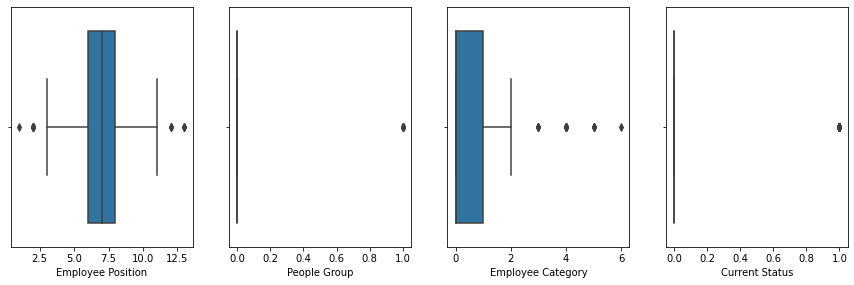

In [32]:
import seaborn as sns

int_cols=list(df.select_dtypes(['int64']).columns)


plt.figure(figsize=(15,15))
for j in range(1,len(int_cols)):
    plt.subplot(3,4,j)
    sns.boxplot(df[int_cols[j]])
       

#### Drop Columns

In [33]:
df = df.drop(["Join Date"], axis =1)

In [34]:
df = df.drop(["Termination Date"], axis =1)

#### Dummy Variable Creation

In [35]:
df1=pd.get_dummies(df)

In [36]:
df1

,Profit Center,Employee Position,People Group,Employee Category,Current Status
0,1,2,0,4,0
1,2,2,0,4,0
2,2,2,0,4,0
3,3,2,0,4,0
4,4,1,0,4,0
...,...,...,...,...,...
784,6,8,0,2,0
785,3,8,0,2,0
786,5,8,0,2,0
787,3,7,0,2,0


In [37]:
depVar = "Current Status"
trainX = df1.drop([depVar], axis = 1).copy()
trainY = df1[depVar].copy()


In [38]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Profit Center      789 non-null    int64
 1   Employee Position  789 non-null    int64
 2   People Group       789 non-null    int64
 3   Employee Category  789 non-null    int64
dtypes: int64(4)
memory usage: 24.8 KB


In [39]:
model_gbm = GradientBoostingClassifier(n_estimators= 5000,
                                      learning_rate = 0.05,
                                      max_depth=3,
                                      subsample=0.5,
                                      validation_fraction= 0.1,
                                      n_iter_no_change = 20,
                                      max_features = 'log2',
                                      verbose=1)

In [40]:
model_gbm.fit(trainX, trainY)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8333           0.0534            9.96s
         2           0.8068           0.0739           14.95s
         3           0.7740           0.0384           13.29s
         4           0.7618           0.0491           15.07s
         5           0.6872           0.0410           15.94s
         6           0.6903           0.0267           16.48s
         7           0.6284           0.0247           15.65s
         8           0.5993           0.0300           15.56s
         9           0.5602           0.0316           15.49s
        10           0.5417           0.0016           15.94s
        20           0.4427           0.0095           15.40s
        30           0.2793           0.0047           13.55s
        40           0.2627           0.0011           12.25s
        50           0.2282           0.0040           11.70s
        60           0.1956           0.0002           11.25s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

# import test data set

In [41]:
df_test = pd.read_excel('D:/My data/Aru/Project/staff utlz latest 17-18_masked.xlsx')

In [42]:
df_test.rename(columns={'Employee Number':'Employee No'},inplace=True)
print(df_test.head())


   Employee No Profit Center      Employee Name Employee Position  \
0            1        PC - 1   Rochette Jilleen           Level 1   
1            2        PC - 2     Daryl Natalina           Level 2   
2            3        PC - 2  Annnora Gabrielle           Level 2   
3            4        PC - 3        Barbee Joey           Level 2   
4            6        PC - 1     Jordanna Danya           Level 2   

  Employee Location          People Group Employee Category   Supervisor name  \
0        Location 3  Client Service Staff            SVP/VP  Idalina Lauraine   
1        Location 7  Client Service Staff            SVP/VP  Idalina Lauraine   
2        Location 7  Client Service Staff            SVP/VP  Idalina Lauraine   
3        Location 1  Client Service Staff          Resigned  Idalina Lauraine   
4        Location 3  Client Service Staff            SVP/VP  Idalina Lauraine   

   Join Date Current Status Termination Date  Total Available Hours  \
0 2000-09-30         Active

In [43]:
print("NO.of Records : ",df_test.shape[0])

print("NO.of Columns : ",df_test.shape[1])

print(df_test.columns)

NO.of Records :  973
NO.of Columns :  18
Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Termination Date',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            973 non-null    int64         
 1   Profit Center          973 non-null    object        
 2   Employee Name          973 non-null    object        
 3   Employee Position      964 non-null    object        
 4   Employee Location      973 non-null    object        
 5   People Group           973 non-null    object        
 6   Employee Category      973 non-null    object        
 7   Supervisor name        973 non-null    object        
 8   Join Date              973 non-null    datetime64[ns]
 9   Current Status         973 non-null    object        
 10  Termination Date       145 non-null    datetime64[ns]
 11  Total Available Hours  973 non-null    float64       
 12  Work Hours             973 non-null    float64       
 13  Leave

In [45]:
df_test.describe()

,Employee No,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,589.393628,1419.998016,1098.604902,185.403905,28.630966,63.147996,335.591316
std,321.730420,582.941410,643.488904,164.402185,29.013199,256.820173,393.627343
min,1.000000,-40.000000,-42.000000,0.000000,0.000000,0.000000,-8.000000
25%,317.000000,1097.500000,560.000000,96.000000,8.000000,0.000000,60.000000
50%,612.000000,1733.000000,1240.000000,176.000000,23.000000,0.000000,200.000000
75%,868.000000,1836.500000,1656.000000,248.000000,40.000000,0.000000,450.000000
max,1111.000000,2080.000000,2669.000000,2080.000000,150.000000,2015.000000,2257.000000


In [46]:
# Data Preparation 

#1. chech missing values

df_test.isnull().sum()
# no null values in data set


Employee No                0
Profit Center              0
Employee Name              0
Employee Position          9
Employee Location          0
People Group               0
Employee Category          0
Supervisor name            0
Join Date                  0
Current Status             0
Termination Date         828
Total Available Hours      0
Work Hours                 0
Leave Hours                0
Training Hours             0
BD Hours                   0
NC Hours                   0
Utilization%               0
dtype: int64

In [47]:
df_test.nunique().sort_values()

People Group               2
Current Status             5
Profit Center              6
Employee Location          9
Employee Position         11
Employee Category         11
Termination Date          15
BD Hours                 102
Join Date                120
Leave Hours              134
Supervisor name          139
Training Hours           226
NC Hours                 535
Total Available Hours    670
Work Hours               705
Utilization%             877
Employee Name            971
Employee No              973
dtype: int64

In [48]:
### Drop unnecessary columns

df_test=df_test.drop('Employee No',axis=1)

df_test=df_test.drop('Employee Name',axis=1)

df_test=df_test.drop('Employee Location',axis=1)

df_test=df_test.drop('BD Hours',axis=1)

df_test=df_test.drop('Training Hours',axis=1)

df_test=df_test.drop('Work Hours',axis=1)

df_test=df_test.drop('NC Hours',axis=1)

df_test=df_test.drop('Utilization%',axis=1)

df_test=df_test.drop('Leave Hours',axis=1)

df_test=df_test.drop('Total Available Hours',axis=1)

df_test=df_test.drop('Supervisor name',axis=1) 


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Profit Center      973 non-null    object        
 1   Employee Position  964 non-null    object        
 2   People Group       973 non-null    object        
 3   Employee Category  973 non-null    object        
 4   Join Date          973 non-null    datetime64[ns]
 5   Current Status     973 non-null    object        
 6   Termination Date   145 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 53.3+ KB


In [50]:
df_test=df_test.drop('Join Date',axis=1) 
df_test=df_test.drop('Termination Date',axis=1) 


In [51]:
# current status
# Active = 0
# Resigned = 1
# Secondment = 0
#New Joiner = 0
#Sabbatical = 0
var_update = 'Current Status'
df[var_update].value_counts()

# Current Status
df_test[var_update].replace({"Active":0, "Resigned":1, "Secondment":0, "Sabbatical":0, "New Joiner" : 0, 
                             }, inplace = True)

df_test[var_update].value_counts()

0    828
1    145
Name: Current Status, dtype: int64

In [52]:
## categorical values client service staff, support staff
var_update = 'People Group'
df_test[var_update].value_counts() # To check the unique categories of the variable
df_test[var_update].replace({"Client Service Staff":0, "Support Staff":1}, inplace = True)
df_test[var_update].value_counts()

0    963
1     10
Name: People Group, dtype: int64

In [53]:
df_test['Employee Position'].replace(np.nan, "Level 0", inplace = True )

In [54]:
var_update = 'Employee Position'
df_test[var_update].value_counts() # To check the unique categories of the variable


Level 7     324
Level 8     269
Level 6     198
Level 5      90
Level 4      43
Level 3      20
Level 2      11
Level 0       9
Level A2      3
Level A3      3
Level A1      2
Level 1       1
Name: Employee Position, dtype: int64

In [55]:
df_test[var_update].replace({"Level 1":1, "Level 2":2, "Level 3":3, "Level 4":4,
                             "Level 5":5, "Level 6":6, "Level 7":7, "Level 8":8,"Level 10":10,
                             "Level A1":11, "Level A2":12, "Level A3":13, "Level 0":1}, inplace = True)
df_test[var_update].value_counts()

7     324
8     269
6     198
5      90
4      43
3      20
2      11
1      10
12      3
13      3
11      2
Name: Employee Position, dtype: int64

In [56]:
var_update = 'Employee Category'
df_test[var_update].value_counts() # To check the unique categories of the variable


Confirmed Staff                        677
Resigned                               145
Staff on Probation                      96
Serving Notice Period                   31
SVP/VP                                   9
Secondee-Outward-Without Pay             6
Fixed term Staff                         2
Awaiting Termination                     2
Confirmed-Sabbatical                     2
Confirmed Staff (Part-Time 6 Hours)      2
Confirmed Staff (Part-Time 4 Hours)      1
Name: Employee Category, dtype: int64

In [57]:
df_test[var_update].replace({"Confirmed Staff":0,"Serving Notice Period":1, "Staff on Probation":2, 
                                     "Secondee-Outward-Without Pay":3, "Awaiting Termination":5,
                                        "Secondee-Outward-With Pay":6 , "Resigned":7,"SVP/VP":8,"Confirmed-Sabbatical":9,
                            "Confirmed Staff (Part-Time 6 Hours)":10, "Confirmed Staff (Part-Time 6 Hours)":11,
                            "Fixed term Staff":12, "Confirmed Staff (Part-Time 4 Hours)":4}, inplace = True)
df_test[var_update].value_counts()

0     677
7     145
2      96
1      31
8       9
3       6
5       2
9       2
11      2
12      2
4       1
Name: Employee Category, dtype: int64

In [58]:
# profit center
var_update = 'Profit Center'
df_test[var_update].value_counts() # To check the unique categories of the variable

PC - 3     394
PC - 2     306
PC - 1     264
PC - 5       6
PC - 6       2
PC - 11      1
Name: Profit Center, dtype: int64

In [59]:
df_test[var_update].replace({"PC - 1":1,"PC - 2":2, "PC - 3":3, 
                                     "PC - 4":4,  "PC - 5":5, "PC - 6":6,"PC - 7":7,"PC - 8":8,"PC - 9":9,
                                        "PC - 10":10, "PC - 11":11}, inplace = True)
df_test[var_update].value_counts()

3     394
2     306
1     264
5       6
6       2
11      1
Name: Profit Center, dtype: int64

In [60]:
df_test['Profit Center'] = pd.to_numeric(df_test['Profit Center'])

In [61]:
df_test['Employee Position'] = pd.to_numeric(df_test['Employee Position'], errors = 'coerce').astype('Int64')

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Profit Center      973 non-null    int64
 1   Employee Position  973 non-null    Int64
 2   People Group       973 non-null    int64
 3   Employee Category  973 non-null    int64
 4   Current Status     973 non-null    int64
dtypes: Int64(1), int64(4)
memory usage: 39.1 KB


In [63]:
#### Dummy Variable Creation

df_test1=pd.get_dummies(df_test)

In [64]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Profit Center      973 non-null    int64
 1   Employee Position  973 non-null    Int64
 2   People Group       973 non-null    int64
 3   Employee Category  973 non-null    int64
 4   Current Status     973 non-null    int64
dtypes: Int64(1), int64(4)
memory usage: 39.1 KB


In [65]:
depVar = "Current Status"
testX = df_test1.drop([depVar], axis = 1).copy()
testY = df_test1[depVar].copy()


In [66]:
testX

,Profit Center,Employee Position,People Group,Employee Category
0,1,1,0,8
1,2,2,0,8
2,2,2,0,8
3,3,2,0,7
4,1,2,0,8
...,...,...,...,...
968,1,8,0,2
969,1,7,0,2
970,3,8,0,2
971,3,7,0,2


In [67]:
testY

0      0
1      0
2      0
3      1
4      0
      ..
968    0
969    0
970    0
971    0
972    0
Name: Current Status, Length: 973, dtype: int64

#### Prediction

In [69]:
test_pred = model_gbm.predict(testX)

#### Confusion Matrix

In [70]:
Confu_mat = pd.crosstab(testY, test_pred)

In [72]:
Confu_mat

col_0,0,1
Current Status,,
0,797,31
1,145,0


In [73]:
from sklearn.metrics import classification_report

print(classification_report(testY, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       828
           1       0.00      0.00      0.00       145

    accuracy                           0.82       973
   macro avg       0.42      0.48      0.45       973
weighted avg       0.72      0.82      0.77       973

